In [1]:

import cv2
from pytorchyolo import detect, models
import matplotlib.pyplot as plt
import numpy as np
# Load the YOLO model
model = models.load_model(
  "./yolov3-custom.cfg", 
  "./checkpoints512.pth")
import glob
from Classification.Heme_classifer import DeepHeme
from tqdm import tqdm
import os
import pandas as pd
from Visualization.Draw_box_dots import drawer
# Output will be a numpy array in the following format:
# [[x1, y1, x2, y2, confidence, class]]

/home/aa-ssun2-cmp/anaconda3/envs/heme_seg/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


./yolov3-custom.cfg
./yolov3-custom.cfg
did you get activated?
length of model list
107


In [37]:
!zip -r ./data/AML_M1.zip ./data/AML_M1

  adding: data/AML_M1/ (stored 0%)
  adding: data/AML_M1/1082320222029011x335y63.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x108y227.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x340y428.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x212y180.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x350y319.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x408y443.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x104y135.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x337y391.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x200y280.png (deflated 1%)
  adding: data/AML_M1/1082320222029011x115y366.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x102y427.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x423y228.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x413y162.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x68y224.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x323y307.png (defla

  adding: data/AML_M1/1082320222029011x269y380.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x322y348.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x64y161.png (deflated 1%)
  adding: data/AML_M1/1102620210134511x382y59.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x206y307.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x271y189.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x397y48.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x421y398.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x285y210.png (deflated 1%)
  adding: data/AML_M1/1082320222029011x263y114.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x59y309.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x54y347.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x448y423.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x269y349.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x296y301.png (deflated 0%)
  adding: data/AML_M1/10823202

  adding: data/AML_M1/1082320222029011x373y191.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x349y69.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x104y144.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x65y97.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x248y190.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x326y227.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x181y324.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x251y422.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x260y271.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x48y193.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x345y154.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x68y188.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x251y227.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x166y72.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x224y111.png (deflated 0%)
  adding: data/AML_M1/108232022

  adding: data/AML_M1/1082320222029011x429y172.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x249y343.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x140y184.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x349y172.png (deflated 1%)
  adding: data/AML_M1/1082320222029011x88y190.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x99y250.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x148y386.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x320y438.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x101y261.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x307y366.png (stored 0%)
  adding: data/AML_M1/1082320222029011x447y372.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x172y97.png (deflated 1%)
  adding: data/AML_M1/1102620210134511x241y138.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x300y293.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x211y305.png (deflated 0%)
  adding: data/AML_M1/10823202

  adding: data/AML_M1/1082320222029011x67y149.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x282y424.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x148y377.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x299y437.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x262y424.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x361y71.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x64y400.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x167y105.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x181y269.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x162y49.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x175y311.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x206y306.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x305y388.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x107y413.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x456y145.png (deflated 0%)
  adding: data/AML_M1/1082320

  adding: data/AML_M1/1082320222029011x86y446.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x55y109.png (deflated 1%)
  adding: data/AML_M1/1082320222029011x69y321.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x283y179.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x229y177.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x368y192.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x425y343.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x363y416.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x85y207.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x215y339.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x75y399.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x133y451.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x226y449.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x312y136.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x304y424.png (deflated 0%)
  adding: data/AML_M1/10823202

  adding: data/AML_M1/1102620210134511x213y128.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x151y69.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x184y361.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x149y141.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x209y66.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x148y265.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x212y64.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x261y167.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x105y290.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x151y285.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x295y463.png (deflated 1%)
  adding: data/AML_M1/1102620210134511x202y183.png (deflated 1%)
  adding: data/AML_M1/1102620210134511x266y122.png (deflated 0%)
  adding: data/AML_M1/1102620210134511x200y208.png (deflated 0%)
  adding: data/AML_M1/1082320222029011x67y346.png (deflated 0%)
  adding: data/AML_M1/1082320

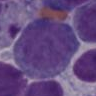

In [22]:
mkdir ./data/monoblast

In [26]:
string = '1082320221656223'
for _dir in tqdm(glob.glob('./data/pre_selected_patches/'+string+'/*jpeg')):
    _dir = _dir.split('/')[-1]
    image = cv2.imread('./data/pre_selected_patches/'+string+'/'+ _dir)
    # Convert OpenCV bgr to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    os.system('rm -rf ./Classification/outputs')
    boxes = detect.detect_image(model, image, conf_thres=0.1, nms_thres=0.1)
    try:
        res_df = DeepHeme(img = image,
                            boxes = boxes,
                           save_dir ='./Classification/' )
    except:
        res_df = res_df.loc[:-1]
    num1 = res_df.shape[0]
    res_df = res_df[~res_df['prediction'].isin(['U1', 'PL2', 'PL3'])]
    res_df_sub = res_df[res_df['prediction'].isin(['M1', 'M2', 'ER1','MO2'])]
    for _img_dir in res_df_sub['dir'].tolist():
        _id = _img_dir.split('/')[-1]
        os.system('cp '+_img_dir +' ./data/monoblast/'+string+_id)
    
    #for images in res_df['dir']
    
    #for dirs in res_df

  0%|          | 0/598 [00:00<?, ?it/s]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  0%|          | 1/598 [00:04<49:14,  4.95s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  0%|          | 2/598 [00:10<50:42,  5.10s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  1%|          | 3/598 [00:14<48:17,  4.87s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  1%|          | 4/598 [00:19<48:29,  4.90s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  1%|          | 5/598 [00:24<48:25,  4.90s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  1%|          | 6/598 [00:28<46:07,  4.68s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  1%|          | 7/598 [00:32<44:10,  4.48s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  1%|▏         | 8/598 [00:37<44:26,  4.52s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  2%|▏         | 9/598 [00:41<41:16,  4.21s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  2%|▏         | 10/598 [00:44<39:10,  4.00s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  2%|▏         | 11/598 [00:48<39:17,  4.02s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  2%|▏         | 12/598 [00:53<40:22,  4.13s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  2%|▏         | 13/598 [00:56<37:31,  3.85s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  2%|▏         | 14/598 [01:01<41:55,  4.31s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  3%|▎         | 15/598 [01:06<44:42,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  3%|▎         | 16/598 [01:12<46:11,  4.76s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  3%|▎         | 17/598 [01:17<46:49,  4.84s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  3%|▎         | 18/598 [01:22<47:46,  4.94s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  3%|▎         | 19/598 [01:27<48:10,  4.99s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  3%|▎         | 20/598 [01:30<43:56,  4.56s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  4%|▎         | 21/598 [01:34<41:02,  4.27s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  4%|▎         | 22/598 [01:38<41:34,  4.33s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  4%|▍         | 23/598 [01:43<40:58,  4.27s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  4%|▍         | 24/598 [01:46<38:12,  3.99s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  4%|▍         | 25/598 [01:49<36:36,  3.83s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  4%|▍         | 26/598 [01:54<38:53,  4.08s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  5%|▍         | 27/598 [01:57<37:03,  3.89s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  5%|▍         | 28/598 [02:01<36:13,  3.81s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  5%|▍         | 29/598 [02:05<35:34,  3.75s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  5%|▌         | 30/598 [02:09<37:17,  3.94s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  5%|▌         | 31/598 [02:14<39:25,  4.17s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  5%|▌         | 32/598 [02:18<38:23,  4.07s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  6%|▌         | 33/598 [02:23<42:30,  4.51s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  6%|▌         | 34/598 [02:28<43:06,  4.59s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  6%|▌         | 35/598 [02:33<42:58,  4.58s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  6%|▌         | 36/598 [02:37<41:40,  4.45s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  6%|▌         | 37/598 [02:41<40:37,  4.34s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  6%|▋         | 38/598 [02:46<43:26,  4.65s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  7%|▋         | 39/598 [02:50<42:01,  4.51s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  7%|▋         | 40/598 [02:54<40:35,  4.37s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  7%|▋         | 41/598 [02:59<40:04,  4.32s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  7%|▋         | 42/598 [03:04<42:12,  4.55s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  7%|▋         | 43/598 [03:08<42:34,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  7%|▋         | 44/598 [03:12<39:42,  4.30s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  8%|▊         | 45/598 [03:16<39:53,  4.33s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  8%|▊         | 46/598 [03:21<39:34,  4.30s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  8%|▊         | 47/598 [03:26<42:48,  4.66s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  8%|▊         | 48/598 [03:30<40:29,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  8%|▊         | 49/598 [03:34<39:04,  4.27s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  8%|▊         | 50/598 [03:39<40:14,  4.41s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  9%|▊         | 51/598 [03:43<40:59,  4.50s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  9%|▊         | 52/598 [03:48<40:22,  4.44s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  9%|▉         | 53/598 [03:52<41:08,  4.53s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


  9%|▉         | 54/598 [03:56<39:51,  4.40s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  9%|▉         | 55/598 [04:00<38:35,  4.26s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
  9%|▉         | 56/598 [04:04<37:59,  4.21s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 10%|▉         | 57/598 [04:09<39:02,  4.33s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 10%|▉         | 58/598 [04:13<37:09,  4.13s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 10%|▉         | 59/598 [04:17<38:07,  4.24s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 10%|█         | 60/598 [04:20<35:02,  3.91s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 10%|█         | 61/598 [04:24<33:38,  3.76s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 10%|█         | 62/598 [04:29<36:36,  4.10s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 11%|█         | 63/598 [04:33<38:13,  4.29s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 11%|█         | 64/598 [04:38<38:00,  4.27s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 11%|█         | 65/598 [04:41<35:29,  3.99s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 11%|█         | 66/598 [04:45<36:30,  4.12s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 11%|█         | 67/598 [04:50<36:55,  4.17s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 11%|█▏        | 68/598 [04:54<37:45,  4.27s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 12%|█▏        | 69/598 [05:00<40:24,  4.58s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 12%|█▏        | 70/598 [05:03<37:58,  4.31s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 12%|█▏        | 71/598 [05:08<38:01,  4.33s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 12%|█▏        | 72/598 [05:11<36:32,  4.17s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 12%|█▏        | 73/598 [05:15<35:23,  4.04s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 12%|█▏        | 74/598 [05:18<33:12,  3.80s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 13%|█▎        | 75/598 [05:23<34:59,  4.01s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 13%|█▎        | 76/598 [05:27<34:15,  3.94s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 13%|█▎        | 77/598 [05:30<32:21,  3.73s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 13%|█▎        | 78/598 [05:34<33:37,  3.88s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 13%|█▎        | 79/598 [05:39<35:41,  4.13s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 13%|█▎        | 80/598 [05:43<35:00,  4.06s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 14%|█▎        | 81/598 [05:47<36:02,  4.18s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 14%|█▎        | 82/598 [05:50<33:22,  3.88s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 14%|█▍        | 83/598 [05:54<32:48,  3.82s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 14%|█▍        | 84/598 [05:57<31:22,  3.66s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 14%|█▍        | 85/598 [06:01<31:22,  3.67s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 14%|█▍        | 86/598 [06:05<32:48,  3.84s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 15%|█▍        | 87/598 [06:09<33:39,  3.95s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 15%|█▍        | 88/598 [06:13<33:35,  3.95s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 15%|█▍        | 89/598 [06:17<33:33,  3.95s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 15%|█▌        | 90/598 [06:21<33:07,  3.91s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 15%|█▌        | 91/598 [06:25<32:57,  3.90s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 15%|█▌        | 92/598 [06:31<37:41,  4.47s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 16%|█▌        | 93/598 [06:36<38:36,  4.59s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 16%|█▌        | 94/598 [06:41<39:17,  4.68s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 16%|█▌        | 95/598 [06:44<37:10,  4.43s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 16%|█▌        | 96/598 [06:48<34:47,  4.16s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 16%|█▌        | 97/598 [06:51<32:47,  3.93s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 16%|█▋        | 98/598 [06:56<34:02,  4.08s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 17%|█▋        | 99/598 [07:00<33:15,  4.00s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 17%|█▋        | 100/598 [07:03<32:33,  3.92s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 17%|█▋        | 101/598 [07:07<31:27,  3.80s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 17%|█▋        | 102/598 [07:11<31:43,  3.84s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 17%|█▋        | 103/598 [07:14<31:04,  3.77s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 17%|█▋        | 104/598 [07:20<34:44,  4.22s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 18%|█▊        | 105/598 [07:25<37:25,  4.55s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 18%|█▊        | 106/598 [07:30<38:27,  4.69s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 18%|█▊        | 107/598 [07:35<38:50,  4.75s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 18%|█▊        | 108/598 [07:38<35:48,  4.39s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 18%|█▊        | 109/598 [07:42<34:39,  4.25s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 18%|█▊        | 110/598 [07:48<36:55,  4.54s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 19%|█▊        | 111/598 [07:51<34:16,  4.22s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 19%|█▊        | 112/598 [07:55<32:56,  4.07s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 19%|█▉        | 113/598 [07:59<33:55,  4.20s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 19%|█▉        | 114/598 [08:04<34:23,  4.26s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 19%|█▉        | 115/598 [08:07<32:38,  4.05s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 19%|█▉        | 116/598 [08:12<33:14,  4.14s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 20%|█▉        | 117/598 [08:16<32:59,  4.11s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 20%|█▉        | 118/598 [08:20<34:28,  4.31s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 20%|█▉        | 119/598 [08:26<36:28,  4.57s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 20%|██        | 120/598 [08:32<40:44,  5.11s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 20%|██        | 121/598 [08:37<39:40,  4.99s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 20%|██        | 122/598 [08:40<35:45,  4.51s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 21%|██        | 123/598 [08:44<35:00,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 21%|██        | 124/598 [08:48<34:17,  4.34s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 21%|██        | 125/598 [08:53<35:00,  4.44s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 21%|██        | 126/598 [08:57<34:24,  4.37s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 21%|██        | 127/598 [09:02<33:57,  4.33s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 21%|██▏       | 128/598 [09:07<36:36,  4.67s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 22%|██▏       | 129/598 [09:12<37:40,  4.82s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 22%|██▏       | 130/598 [09:17<38:40,  4.96s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 22%|██▏       | 131/598 [09:22<36:34,  4.70s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 22%|██▏       | 132/598 [09:27<37:30,  4.83s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 22%|██▏       | 133/598 [09:31<35:19,  4.56s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 22%|██▏       | 134/598 [09:36<37:17,  4.82s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 23%|██▎       | 135/598 [09:40<35:48,  4.64s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 23%|██▎       | 136/598 [09:44<33:21,  4.33s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 23%|██▎       | 137/598 [09:49<34:06,  4.44s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 23%|██▎       | 138/598 [09:52<31:26,  4.10s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 23%|██▎       | 139/598 [09:57<33:23,  4.36s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 23%|██▎       | 140/598 [10:00<31:02,  4.07s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 24%|██▎       | 141/598 [10:04<29:28,  3.87s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 24%|██▎       | 142/598 [10:08<31:20,  4.12s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 24%|██▍       | 143/598 [10:13<32:43,  4.32s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 24%|██▍       | 144/598 [10:17<31:33,  4.17s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 24%|██▍       | 145/598 [10:21<30:10,  4.00s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 24%|██▍       | 146/598 [10:25<31:39,  4.20s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 25%|██▍       | 147/598 [10:29<31:32,  4.20s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 25%|██▍       | 148/598 [10:34<32:55,  4.39s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 25%|██▍       | 149/598 [10:39<34:45,  4.64s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 25%|██▌       | 150/598 [10:44<34:44,  4.65s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 25%|██▌       | 151/598 [10:50<37:17,  5.01s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 25%|██▌       | 152/598 [10:54<34:01,  4.58s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 26%|██▌       | 153/598 [10:57<32:13,  4.34s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 26%|██▌       | 154/598 [11:01<31:10,  4.21s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 26%|██▌       | 155/598 [11:06<31:48,  4.31s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 26%|██▌       | 156/598 [11:09<29:36,  4.02s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 26%|██▋       | 157/598 [11:13<29:27,  4.01s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 26%|██▋       | 158/598 [11:17<28:21,  3.87s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 27%|██▋       | 159/598 [11:20<27:32,  3.76s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 27%|██▋       | 160/598 [11:23<26:24,  3.62s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 27%|██▋       | 161/598 [11:27<26:48,  3.68s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 27%|██▋       | 162/598 [11:32<28:50,  3.97s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 27%|██▋       | 163/598 [11:35<27:31,  3.80s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 27%|██▋       | 164/598 [11:39<27:23,  3.79s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 28%|██▊       | 165/598 [11:44<29:26,  4.08s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 28%|██▊       | 166/598 [11:48<30:14,  4.20s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 28%|██▊       | 167/598 [11:53<31:38,  4.41s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 28%|██▊       | 168/598 [11:58<32:18,  4.51s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 28%|██▊       | 169/598 [12:02<31:29,  4.41s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 28%|██▊       | 170/598 [12:06<31:17,  4.39s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 29%|██▊       | 171/598 [12:11<31:37,  4.44s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 29%|██▉       | 172/598 [12:15<31:08,  4.39s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 29%|██▉       | 173/598 [12:20<31:18,  4.42s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 29%|██▉       | 174/598 [12:25<32:30,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 29%|██▉       | 175/598 [12:30<33:08,  4.70s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 29%|██▉       | 176/598 [12:34<32:26,  4.61s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 30%|██▉       | 177/598 [12:39<32:14,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 30%|██▉       | 178/598 [12:43<30:40,  4.38s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 30%|██▉       | 179/598 [12:47<30:19,  4.34s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 30%|███       | 180/598 [12:52<31:49,  4.57s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 30%|███       | 181/598 [12:57<32:13,  4.64s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 30%|███       | 182/598 [13:01<32:08,  4.64s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 31%|███       | 183/598 [13:05<30:35,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 31%|███       | 184/598 [13:10<30:37,  4.44s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 31%|███       | 185/598 [13:14<31:04,  4.51s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 31%|███       | 186/598 [13:19<30:16,  4.41s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 31%|███▏      | 187/598 [13:22<27:53,  4.07s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 31%|███▏      | 188/598 [13:25<26:30,  3.88s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 32%|███▏      | 189/598 [13:29<25:50,  3.79s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 32%|███▏      | 190/598 [13:32<24:52,  3.66s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 32%|███▏      | 191/598 [13:37<26:10,  3.86s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 32%|███▏      | 192/598 [13:40<24:57,  3.69s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 32%|███▏      | 193/598 [13:43<24:24,  3.62s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 32%|███▏      | 194/598 [13:47<24:07,  3.58s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 33%|███▎      | 195/598 [13:51<25:29,  3.80s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 33%|███▎      | 196/598 [13:56<27:02,  4.04s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 33%|███▎      | 197/598 [14:00<26:24,  3.95s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 33%|███▎      | 198/598 [14:03<25:54,  3.89s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 33%|███▎      | 199/598 [14:08<27:29,  4.13s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 33%|███▎      | 200/598 [14:11<25:59,  3.92s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 34%|███▎      | 201/598 [14:17<28:31,  4.31s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 34%|███▍      | 202/598 [14:20<27:23,  4.15s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 34%|███▍      | 203/598 [14:25<29:06,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 34%|███▍      | 204/598 [14:29<27:44,  4.23s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 34%|███▍      | 205/598 [14:34<29:15,  4.47s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 34%|███▍      | 206/598 [14:39<29:32,  4.52s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 35%|███▍      | 207/598 [14:42<27:26,  4.21s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 35%|███▍      | 208/598 [14:47<27:49,  4.28s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 35%|███▍      | 209/598 [14:50<25:59,  4.01s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 35%|███▌      | 210/598 [14:56<29:00,  4.48s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 35%|███▌      | 211/598 [15:00<28:53,  4.48s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 35%|███▌      | 212/598 [15:05<30:03,  4.67s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 36%|███▌      | 213/598 [15:09<28:04,  4.38s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 36%|███▌      | 214/598 [15:12<26:12,  4.09s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 36%|███▌      | 215/598 [15:16<25:32,  4.00s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 36%|███▌      | 216/598 [15:20<25:50,  4.06s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 36%|███▋      | 217/598 [15:25<26:53,  4.23s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 36%|███▋      | 218/598 [15:29<25:13,  3.98s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 37%|███▋      | 219/598 [15:32<24:11,  3.83s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 37%|███▋      | 220/598 [15:37<26:26,  4.20s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 37%|███▋      | 221/598 [15:41<26:00,  4.14s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 37%|███▋      | 222/598 [15:45<25:27,  4.06s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 37%|███▋      | 223/598 [15:50<27:18,  4.37s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 37%|███▋      | 224/598 [15:54<26:57,  4.32s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 38%|███▊      | 225/598 [15:58<26:26,  4.25s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 38%|███▊      | 226/598 [16:02<24:59,  4.03s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 38%|███▊      | 227/598 [16:05<23:29,  3.80s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 38%|███▊      | 228/598 [16:10<25:01,  4.06s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 38%|███▊      | 229/598 [16:14<25:02,  4.07s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 38%|███▊      | 230/598 [16:17<23:42,  3.87s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 39%|███▊      | 231/598 [16:22<25:05,  4.10s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 39%|███▉      | 232/598 [16:25<23:49,  3.91s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 39%|███▉      | 233/598 [16:29<23:24,  3.85s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 39%|███▉      | 234/598 [16:33<23:28,  3.87s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 39%|███▉      | 235/598 [16:37<23:27,  3.88s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 39%|███▉      | 236/598 [16:41<24:06,  4.00s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 40%|███▉      | 237/598 [16:46<25:23,  4.22s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 40%|███▉      | 238/598 [16:51<26:24,  4.40s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 40%|███▉      | 239/598 [16:55<26:52,  4.49s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 40%|████      | 240/598 [17:00<26:14,  4.40s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 40%|████      | 241/598 [17:05<27:37,  4.64s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 40%|████      | 242/598 [17:09<27:38,  4.66s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 41%|████      | 243/598 [17:13<25:26,  4.30s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 41%|████      | 244/598 [17:18<26:04,  4.42s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 41%|████      | 245/598 [17:23<26:52,  4.57s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 41%|████      | 246/598 [17:28<27:30,  4.69s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 41%|████▏     | 247/598 [17:32<27:41,  4.73s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 41%|████▏     | 248/598 [17:37<28:14,  4.84s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 42%|████▏     | 249/598 [17:41<26:21,  4.53s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 42%|████▏     | 250/598 [17:45<24:40,  4.25s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 42%|████▏     | 251/598 [17:49<23:45,  4.11s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 42%|████▏     | 252/598 [17:52<22:34,  3.91s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 42%|████▏     | 253/598 [17:57<24:02,  4.18s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 42%|████▏     | 254/598 [18:02<25:27,  4.44s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 43%|████▎     | 255/598 [18:07<26:10,  4.58s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 43%|████▎     | 256/598 [18:11<25:45,  4.52s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 43%|████▎     | 257/598 [18:15<24:07,  4.24s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 43%|████▎     | 258/598 [18:19<23:42,  4.18s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 43%|████▎     | 259/598 [18:24<25:57,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 43%|████▎     | 260/598 [18:28<24:11,  4.29s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 44%|████▎     | 261/598 [18:32<23:10,  4.13s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 44%|████▍     | 262/598 [18:36<23:41,  4.23s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 44%|████▍     | 263/598 [18:41<23:44,  4.25s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 44%|████▍     | 264/598 [18:44<22:17,  4.00s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 44%|████▍     | 265/598 [18:48<22:46,  4.10s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 44%|████▍     | 266/598 [18:52<22:09,  4.00s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 45%|████▍     | 267/598 [18:57<24:03,  4.36s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 45%|████▍     | 268/598 [19:01<22:25,  4.08s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 45%|████▍     | 269/598 [19:06<23:42,  4.32s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 45%|████▌     | 270/598 [19:10<23:50,  4.36s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 45%|████▌     | 271/598 [19:13<22:03,  4.05s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 45%|████▌     | 272/598 [19:18<22:29,  4.14s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 46%|████▌     | 273/598 [19:22<23:12,  4.28s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 46%|████▌     | 274/598 [19:27<24:10,  4.48s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 46%|████▌     | 275/598 [19:31<23:41,  4.40s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 46%|████▌     | 276/598 [19:36<23:48,  4.43s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 46%|████▋     | 277/598 [19:41<24:34,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 46%|████▋     | 278/598 [19:46<25:27,  4.77s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 47%|████▋     | 279/598 [19:50<23:48,  4.48s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 47%|████▋     | 280/598 [19:55<23:52,  4.51s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 47%|████▋     | 281/598 [19:59<24:06,  4.56s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 47%|████▋     | 282/598 [20:05<25:14,  4.79s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 47%|████▋     | 283/598 [20:09<24:16,  4.63s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 47%|████▋     | 284/598 [20:12<22:45,  4.35s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 48%|████▊     | 285/598 [20:16<21:43,  4.16s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 48%|████▊     | 286/598 [20:22<23:25,  4.50s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 48%|████▊     | 287/598 [20:26<22:55,  4.42s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 48%|████▊     | 288/598 [20:31<24:21,  4.71s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 48%|████▊     | 289/598 [20:36<24:41,  4.79s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 48%|████▊     | 290/598 [20:40<23:13,  4.53s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 49%|████▊     | 291/598 [20:45<23:32,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 49%|████▉     | 292/598 [20:48<22:01,  4.32s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 49%|████▉     | 293/598 [20:53<22:35,  4.44s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 49%|████▉     | 294/598 [20:58<23:44,  4.69s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 49%|████▉     | 295/598 [21:03<23:01,  4.56s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 49%|████▉     | 296/598 [21:07<22:23,  4.45s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 50%|████▉     | 297/598 [21:12<22:54,  4.57s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 50%|████▉     | 298/598 [21:16<22:40,  4.53s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 50%|█████     | 299/598 [21:20<21:28,  4.31s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 50%|█████     | 300/598 [21:23<20:07,  4.05s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 50%|█████     | 301/598 [21:27<18:43,  3.78s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 51%|█████     | 302/598 [21:32<20:48,  4.22s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 51%|█████     | 303/598 [21:37<22:09,  4.51s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 51%|█████     | 304/598 [21:42<23:30,  4.80s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 51%|█████     | 305/598 [21:46<22:03,  4.52s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 51%|█████     | 306/598 [21:51<22:11,  4.56s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 51%|█████▏    | 307/598 [21:55<20:47,  4.29s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 52%|█████▏    | 308/598 [21:59<20:09,  4.17s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 52%|█████▏    | 309/598 [22:04<21:20,  4.43s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 52%|█████▏    | 310/598 [22:09<22:15,  4.64s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 52%|█████▏    | 311/598 [22:14<22:26,  4.69s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 52%|█████▏    | 312/598 [22:19<23:19,  4.89s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 52%|█████▏    | 313/598 [22:23<22:17,  4.69s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 53%|█████▎    | 314/598 [22:27<21:15,  4.49s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 53%|█████▎    | 315/598 [22:31<20:25,  4.33s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 53%|█████▎    | 316/598 [22:36<20:46,  4.42s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 53%|█████▎    | 317/598 [22:41<21:22,  4.56s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 53%|█████▎    | 318/598 [22:45<21:05,  4.52s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 53%|█████▎    | 319/598 [22:48<19:32,  4.20s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 54%|█████▎    | 320/598 [22:52<18:03,  3.90s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 54%|█████▎    | 321/598 [22:56<17:58,  3.89s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 54%|█████▍    | 322/598 [23:00<18:47,  4.09s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 54%|█████▍    | 323/598 [23:04<17:51,  3.90s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 54%|█████▍    | 324/598 [23:07<17:10,  3.76s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 54%|█████▍    | 325/598 [23:12<18:22,  4.04s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 55%|█████▍    | 326/598 [23:16<18:51,  4.16s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 55%|█████▍    | 327/598 [23:19<17:34,  3.89s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 55%|█████▍    | 328/598 [23:24<18:24,  4.09s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 55%|█████▌    | 329/598 [23:28<17:46,  3.96s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 55%|█████▌    | 330/598 [23:31<16:51,  3.77s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 55%|█████▌    | 331/598 [23:35<17:40,  3.97s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 56%|█████▌    | 332/598 [23:39<17:44,  4.00s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 56%|█████▌    | 333/598 [23:44<18:53,  4.28s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 56%|█████▌    | 334/598 [23:49<18:57,  4.31s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 56%|█████▌    | 335/598 [23:53<18:54,  4.31s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 56%|█████▌    | 336/598 [23:58<19:53,  4.55s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 56%|█████▋    | 337/598 [24:02<18:57,  4.36s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 57%|█████▋    | 338/598 [24:06<17:49,  4.11s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 57%|█████▋    | 339/598 [24:10<18:05,  4.19s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 57%|█████▋    | 340/598 [24:14<17:44,  4.13s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 57%|█████▋    | 341/598 [24:18<17:24,  4.06s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 57%|█████▋    | 342/598 [24:23<18:37,  4.36s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 57%|█████▋    | 343/598 [24:27<17:30,  4.12s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 58%|█████▊    | 344/598 [24:31<17:40,  4.17s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 58%|█████▊    | 345/598 [24:35<17:04,  4.05s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 58%|█████▊    | 346/598 [24:39<17:40,  4.21s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 58%|█████▊    | 347/598 [24:44<17:49,  4.26s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 58%|█████▊    | 348/598 [24:48<17:44,  4.26s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 58%|█████▊    | 349/598 [24:52<17:51,  4.30s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 59%|█████▊    | 350/598 [24:57<17:57,  4.34s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 59%|█████▊    | 351/598 [25:02<18:46,  4.56s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 59%|█████▉    | 352/598 [25:07<19:00,  4.64s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 59%|█████▉    | 353/598 [25:10<17:46,  4.35s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 59%|█████▉    | 354/598 [25:14<16:39,  4.10s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 59%|█████▉    | 355/598 [25:19<17:57,  4.43s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 60%|█████▉    | 356/598 [25:24<18:45,  4.65s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 60%|█████▉    | 357/598 [25:29<18:54,  4.71s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 60%|█████▉    | 358/598 [25:32<17:17,  4.32s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 60%|██████    | 359/598 [25:37<17:21,  4.36s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 60%|██████    | 360/598 [25:41<16:56,  4.27s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 60%|██████    | 361/598 [25:44<15:40,  3.97s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 61%|██████    | 362/598 [25:48<16:02,  4.08s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 61%|██████    | 363/598 [25:54<17:22,  4.43s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 61%|██████    | 364/598 [25:59<18:28,  4.74s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 61%|██████    | 365/598 [26:04<18:32,  4.77s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 61%|██████    | 366/598 [26:08<17:41,  4.58s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 61%|██████▏   | 367/598 [26:12<16:16,  4.23s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 62%|██████▏   | 368/598 [26:15<15:10,  3.96s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 62%|██████▏   | 369/598 [26:20<16:11,  4.24s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 62%|██████▏   | 370/598 [26:24<15:37,  4.11s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 62%|██████▏   | 371/598 [26:28<16:08,  4.27s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 62%|██████▏   | 372/598 [26:32<15:55,  4.23s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 62%|██████▏   | 373/598 [26:37<16:28,  4.39s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 63%|██████▎   | 374/598 [26:41<15:46,  4.22s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 63%|██████▎   | 375/598 [26:44<14:36,  3.93s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 63%|██████▎   | 376/598 [26:49<15:01,  4.06s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 63%|██████▎   | 377/598 [26:53<15:17,  4.15s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 63%|██████▎   | 378/598 [26:58<16:02,  4.38s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 63%|██████▎   | 379/598 [27:01<15:09,  4.15s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 64%|██████▎   | 380/598 [27:05<14:53,  4.10s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 64%|██████▎   | 381/598 [27:09<14:08,  3.91s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 64%|██████▍   | 382/598 [27:13<14:27,  4.02s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 64%|██████▍   | 383/598 [27:17<14:11,  3.96s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 64%|██████▍   | 384/598 [27:21<13:38,  3.83s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 64%|██████▍   | 385/598 [27:25<13:56,  3.93s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 65%|██████▍   | 386/598 [27:30<15:19,  4.34s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 65%|██████▍   | 387/598 [27:34<14:35,  4.15s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 65%|██████▍   | 388/598 [27:39<15:16,  4.36s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 65%|██████▌   | 389/598 [27:44<15:52,  4.56s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 65%|██████▌   | 390/598 [27:49<17:09,  4.95s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 65%|██████▌   | 391/598 [27:54<16:57,  4.92s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 66%|██████▌   | 392/598 [27:58<15:10,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 66%|██████▌   | 393/598 [28:01<13:57,  4.08s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 66%|██████▌   | 394/598 [28:04<13:17,  3.91s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 66%|██████▌   | 395/598 [28:09<13:48,  4.08s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 66%|██████▌   | 396/598 [28:12<13:19,  3.96s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 66%|██████▋   | 397/598 [28:19<16:05,  4.80s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 67%|██████▋   | 398/598 [28:23<14:50,  4.45s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 67%|██████▋   | 399/598 [28:28<15:00,  4.53s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 67%|██████▋   | 400/598 [28:31<13:44,  4.16s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 67%|██████▋   | 401/598 [28:35<13:43,  4.18s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 67%|██████▋   | 402/598 [28:40<14:38,  4.48s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 67%|██████▋   | 403/598 [28:45<14:57,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 68%|██████▊   | 404/598 [28:49<14:30,  4.48s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 68%|██████▊   | 405/598 [28:54<14:12,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 68%|██████▊   | 406/598 [28:59<14:36,  4.57s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 68%|██████▊   | 407/598 [29:03<14:07,  4.44s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 68%|██████▊   | 408/598 [29:07<13:33,  4.28s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 68%|██████▊   | 409/598 [29:10<12:34,  3.99s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 69%|██████▊   | 410/598 [29:13<11:59,  3.83s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 69%|██████▊   | 411/598 [29:17<11:53,  3.81s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 69%|██████▉   | 412/598 [29:22<12:47,  4.13s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 69%|██████▉   | 413/598 [29:25<12:01,  3.90s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 69%|██████▉   | 414/598 [29:30<12:54,  4.21s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 69%|██████▉   | 415/598 [29:36<13:49,  4.53s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 70%|██████▉   | 416/598 [29:40<13:24,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 70%|██████▉   | 417/598 [29:45<14:03,  4.66s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 70%|██████▉   | 418/598 [29:49<13:20,  4.45s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 70%|███████   | 419/598 [29:53<13:09,  4.41s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 70%|███████   | 420/598 [29:58<13:06,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 70%|███████   | 421/598 [30:01<11:54,  4.04s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 71%|███████   | 422/598 [30:07<14:00,  4.78s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 71%|███████   | 423/598 [30:11<12:50,  4.40s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 71%|███████   | 424/598 [30:14<11:47,  4.07s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 71%|███████   | 425/598 [30:18<11:49,  4.10s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 71%|███████   | 426/598 [30:23<12:23,  4.32s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 71%|███████▏  | 427/598 [30:26<11:18,  3.97s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 72%|███████▏  | 428/598 [30:31<12:06,  4.27s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 72%|███████▏  | 429/598 [30:35<11:42,  4.16s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 72%|███████▏  | 430/598 [30:40<12:33,  4.49s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 72%|███████▏  | 431/598 [30:44<11:44,  4.22s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 72%|███████▏  | 432/598 [30:49<11:52,  4.29s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 72%|███████▏  | 433/598 [30:53<11:41,  4.25s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 73%|███████▎  | 434/598 [30:57<11:31,  4.22s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 73%|███████▎  | 435/598 [31:01<11:49,  4.35s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 73%|███████▎  | 436/598 [31:06<12:10,  4.51s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 73%|███████▎  | 437/598 [31:12<12:49,  4.78s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 73%|███████▎  | 438/598 [31:16<12:16,  4.61s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 73%|███████▎  | 439/598 [31:20<11:48,  4.45s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 74%|███████▎  | 440/598 [31:24<11:03,  4.20s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 74%|███████▎  | 441/598 [31:28<10:44,  4.10s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 74%|███████▍  | 442/598 [31:31<10:22,  3.99s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 74%|███████▍  | 443/598 [31:37<11:39,  4.51s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 74%|███████▍  | 444/598 [31:40<10:40,  4.16s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 74%|███████▍  | 445/598 [31:45<11:09,  4.37s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 75%|███████▍  | 446/598 [31:49<10:15,  4.05s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 75%|███████▍  | 447/598 [31:53<10:35,  4.21s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 75%|███████▍  | 448/598 [31:57<10:04,  4.03s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 75%|███████▌  | 449/598 [32:02<10:45,  4.34s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 75%|███████▌  | 450/598 [32:06<10:27,  4.24s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 75%|███████▌  | 451/598 [32:11<10:47,  4.41s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 76%|███████▌  | 452/598 [32:14<09:56,  4.08s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 76%|███████▌  | 453/598 [32:19<10:23,  4.30s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 76%|███████▌  | 454/598 [32:23<10:31,  4.39s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 76%|███████▌  | 455/598 [32:27<09:38,  4.05s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 76%|███████▋  | 456/598 [32:30<09:27,  4.00s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 76%|███████▋  | 457/598 [32:34<09:21,  3.98s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 77%|███████▋  | 458/598 [32:40<10:11,  4.37s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 77%|███████▋  | 459/598 [32:44<10:17,  4.44s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 77%|███████▋  | 460/598 [32:48<09:45,  4.24s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 77%|███████▋  | 461/598 [32:51<09:05,  3.98s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 77%|███████▋  | 462/598 [32:56<09:24,  4.15s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 77%|███████▋  | 463/598 [33:00<09:07,  4.06s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 78%|███████▊  | 464/598 [33:04<09:19,  4.17s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 78%|███████▊  | 465/598 [33:08<09:18,  4.20s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 78%|███████▊  | 466/598 [33:14<10:02,  4.57s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 78%|███████▊  | 467/598 [33:19<10:06,  4.63s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 78%|███████▊  | 468/598 [33:23<09:57,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 78%|███████▊  | 469/598 [33:27<09:34,  4.46s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 79%|███████▊  | 470/598 [33:31<08:48,  4.13s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 79%|███████▉  | 471/598 [33:35<08:58,  4.24s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 79%|███████▉  | 472/598 [33:39<08:52,  4.23s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 79%|███████▉  | 473/598 [33:44<08:49,  4.24s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 79%|███████▉  | 474/598 [33:47<08:13,  3.98s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 79%|███████▉  | 475/598 [33:50<07:44,  3.77s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 80%|███████▉  | 476/598 [33:54<07:24,  3.64s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 80%|███████▉  | 477/598 [33:59<08:05,  4.02s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 80%|███████▉  | 478/598 [34:02<07:57,  3.98s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 80%|████████  | 479/598 [34:08<08:36,  4.34s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 80%|████████  | 480/598 [34:12<08:43,  4.43s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 80%|████████  | 481/598 [34:17<08:40,  4.45s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 81%|████████  | 482/598 [34:21<08:11,  4.24s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 81%|████████  | 483/598 [34:25<08:01,  4.18s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 81%|████████  | 484/598 [34:28<07:23,  3.89s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 81%|████████  | 485/598 [34:31<07:02,  3.74s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 81%|████████▏ | 486/598 [34:35<06:46,  3.63s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 81%|████████▏ | 487/598 [34:39<07:16,  3.93s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 82%|████████▏ | 488/598 [34:43<07:23,  4.03s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 82%|████████▏ | 489/598 [34:47<07:17,  4.01s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 82%|████████▏ | 490/598 [34:51<06:45,  3.75s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 82%|████████▏ | 491/598 [34:54<06:47,  3.81s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 82%|████████▏ | 492/598 [34:59<06:59,  3.96s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 82%|████████▏ | 493/598 [35:03<06:58,  3.99s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 83%|████████▎ | 494/598 [35:08<07:20,  4.23s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 83%|████████▎ | 495/598 [35:12<07:04,  4.12s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 83%|████████▎ | 496/598 [35:15<06:35,  3.88s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 83%|████████▎ | 497/598 [35:19<06:36,  3.93s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 83%|████████▎ | 498/598 [35:22<06:18,  3.78s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 83%|████████▎ | 499/598 [35:27<06:41,  4.05s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 84%|████████▎ | 500/598 [35:31<06:39,  4.07s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 84%|████████▍ | 501/598 [35:34<06:14,  3.86s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 84%|████████▍ | 502/598 [35:39<06:40,  4.18s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 84%|████████▍ | 503/598 [35:43<06:26,  4.07s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 84%|████████▍ | 504/598 [35:46<05:59,  3.82s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 84%|████████▍ | 505/598 [35:51<06:28,  4.18s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 85%|████████▍ | 506/598 [35:56<06:44,  4.40s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 85%|████████▍ | 507/598 [36:01<06:37,  4.37s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 85%|████████▍ | 508/598 [36:05<06:30,  4.34s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 85%|████████▌ | 509/598 [36:09<06:17,  4.25s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 85%|████████▌ | 510/598 [36:14<06:24,  4.37s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 85%|████████▌ | 511/598 [36:18<06:25,  4.43s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 86%|████████▌ | 512/598 [36:22<05:52,  4.10s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 86%|████████▌ | 513/598 [36:27<06:24,  4.52s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 86%|████████▌ | 514/598 [36:33<06:51,  4.90s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 86%|████████▌ | 515/598 [36:38<06:47,  4.91s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 86%|████████▋ | 516/598 [36:41<06:11,  4.53s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 86%|████████▋ | 517/598 [36:47<06:32,  4.84s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 87%|████████▋ | 518/598 [36:51<05:59,  4.49s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 87%|████████▋ | 519/598 [36:55<05:54,  4.48s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 87%|████████▋ | 520/598 [37:01<06:21,  4.89s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 87%|████████▋ | 521/598 [37:05<05:56,  4.63s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 87%|████████▋ | 522/598 [37:09<05:33,  4.39s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 87%|████████▋ | 523/598 [37:14<05:38,  4.52s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 88%|████████▊ | 524/598 [37:18<05:28,  4.44s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 88%|████████▊ | 525/598 [37:22<05:07,  4.21s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 88%|████████▊ | 526/598 [37:27<05:25,  4.52s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 88%|████████▊ | 527/598 [37:32<05:36,  4.74s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 88%|████████▊ | 528/598 [37:37<05:32,  4.74s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 88%|████████▊ | 529/598 [37:42<05:28,  4.76s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 89%|████████▊ | 530/598 [37:47<05:29,  4.84s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 89%|████████▉ | 531/598 [37:51<05:11,  4.64s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 89%|████████▉ | 532/598 [37:56<05:21,  4.86s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 89%|████████▉ | 533/598 [38:01<05:23,  4.98s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 89%|████████▉ | 534/598 [38:07<05:22,  5.04s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 89%|████████▉ | 535/598 [38:12<05:25,  5.17s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 90%|████████▉ | 536/598 [38:18<05:29,  5.32s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 90%|████████▉ | 537/598 [38:23<05:16,  5.19s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 90%|████████▉ | 538/598 [38:28<05:19,  5.33s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 90%|█████████ | 539/598 [38:33<05:03,  5.15s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 90%|█████████ | 540/598 [38:39<05:06,  5.29s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 90%|█████████ | 541/598 [38:45<05:13,  5.50s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 91%|█████████ | 542/598 [38:49<04:55,  5.28s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 91%|█████████ | 543/598 [38:53<04:21,  4.75s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 91%|█████████ | 544/598 [38:59<04:37,  5.14s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 91%|█████████ | 545/598 [39:03<04:13,  4.78s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 91%|█████████▏| 546/598 [39:06<03:49,  4.42s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 91%|█████████▏| 547/598 [39:10<03:32,  4.16s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 92%|█████████▏| 548/598 [39:14<03:17,  3.96s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 92%|█████████▏| 549/598 [39:19<03:39,  4.47s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 92%|█████████▏| 550/598 [39:24<03:39,  4.57s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 92%|█████████▏| 551/598 [39:28<03:30,  4.48s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 92%|█████████▏| 552/598 [39:32<03:18,  4.32s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 92%|█████████▏| 553/598 [39:37<03:16,  4.36s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 93%|█████████▎| 554/598 [39:41<03:16,  4.47s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 93%|█████████▎| 555/598 [39:46<03:18,  4.62s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 93%|█████████▎| 556/598 [39:52<03:23,  4.85s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 93%|█████████▎| 557/598 [39:56<03:16,  4.78s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 93%|█████████▎| 558/598 [40:02<03:17,  4.95s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 93%|█████████▎| 559/598 [40:06<03:04,  4.72s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 94%|█████████▎| 560/598 [40:10<02:53,  4.57s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 94%|█████████▍| 561/598 [40:16<03:00,  4.88s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 94%|█████████▍| 562/598 [40:21<02:59,  4.98s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 94%|█████████▍| 563/598 [40:26<02:52,  4.94s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 94%|█████████▍| 564/598 [40:29<02:33,  4.50s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 94%|█████████▍| 565/598 [40:34<02:29,  4.53s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 95%|█████████▍| 566/598 [40:38<02:25,  4.56s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 95%|█████████▍| 567/598 [40:43<02:22,  4.61s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 95%|█████████▍| 568/598 [40:48<02:18,  4.61s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 95%|█████████▌| 569/598 [40:52<02:12,  4.56s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 95%|█████████▌| 570/598 [40:56<02:02,  4.37s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 95%|█████████▌| 571/598 [41:01<01:58,  4.38s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 96%|█████████▌| 572/598 [41:04<01:43,  4.00s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 96%|█████████▌| 573/598 [41:08<01:42,  4.11s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 96%|█████████▌| 574/598 [41:13<01:41,  4.24s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 96%|█████████▌| 575/598 [41:18<01:45,  4.59s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 96%|█████████▋| 576/598 [41:21<01:32,  4.19s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 96%|█████████▋| 577/598 [41:25<01:26,  4.13s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 97%|█████████▋| 578/598 [41:30<01:25,  4.29s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 97%|█████████▋| 579/598 [41:33<01:14,  3.93s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 97%|█████████▋| 580/598 [41:37<01:11,  3.95s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 97%|█████████▋| 581/598 [41:40<01:04,  3.79s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 97%|█████████▋| 582/598 [41:44<01:01,  3.85s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 97%|█████████▋| 583/598 [41:49<01:01,  4.12s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 98%|█████████▊| 584/598 [41:53<00:57,  4.14s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 98%|█████████▊| 585/598 [41:58<00:54,  4.19s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 98%|█████████▊| 586/598 [42:01<00:47,  4.00s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 98%|█████████▊| 587/598 [42:04<00:41,  3.75s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 98%|█████████▊| 588/598 [42:08<00:37,  3.74s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 98%|█████████▊| 589/598 [42:13<00:36,  4.09s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 99%|█████████▊| 590/598 [42:18<00:35,  4.46s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 99%|█████████▉| 591/598 [42:23<00:32,  4.60s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 99%|█████████▉| 592/598 [42:27<00:25,  4.31s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 99%|█████████▉| 593/598 [42:31<00:20,  4.20s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


 99%|█████████▉| 594/598 [42:35<00:17,  4.29s/it]

Creating the cell patches
Done
Now let's do the prediction!


Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0
 99%|█████████▉| 595/598 [42:40<00:13,  4.43s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


100%|█████████▉| 596/598 [42:45<00:09,  4.55s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


100%|█████████▉| 597/598 [42:50<00:04,  4.66s/it]Using cache found in /home/aa-ssun2-cmp/.cache/torch/hub/pytorch_vision_v0.10.0


Creating the cell patches
Done
Now let's do the prediction!


100%|██████████| 598/598 [42:53<00:00,  4.30s/it]


In [9]:
res_df

,dir,x1,x2,y1,y2,center,prediction
2,./Classification/outputs/x242y65.png,214,270,36,93,"(242, 65)",M4
6,./Classification/outputs/x205y103.png,175,235,71,134,"(205, 103)",M1
10,./Classification/outputs/x241y154.png,212,270,125,183,"(241, 154)",L2


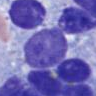

In [7]:
from PIL import Image
Image.open('./Classification/outputs/x205y103.png')

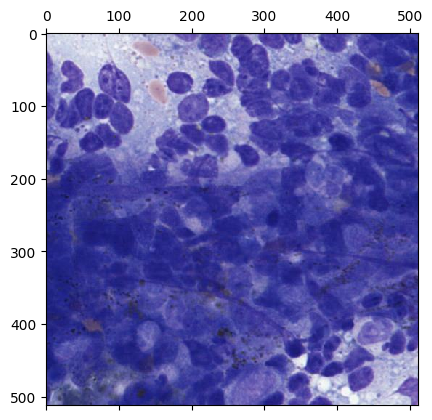